[0.97733786 0.03422779]


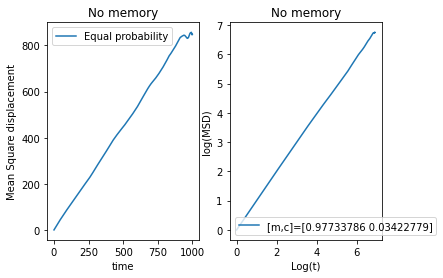

[0.97196711 0.05820141]


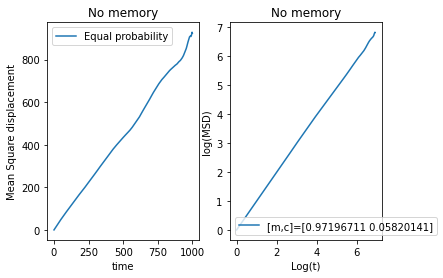

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

# Number of Steps
num_steps = 1000

# Number of Walkers
num_walks = 100

# Variables for Mean Square distance Calculation
x2 = np.zeros(num_steps)

# Variable for time steps
t = np.arange(num_steps)


# Variable for walker position at time t
x = np.zeros(num_steps)

for k in range (num_walks):    
  for i in range(1, num_steps):
    prob = np.random.uniform(0,1)
    if prob < 0.5:
      x[i] = x[i - 1] + 1
    else:
      x[i] = x[i - 1] - 1
  for j in range(1,num_steps):
    c = 0.0
    for l in range(j,num_steps):
      c = c + (x[l] - x[l-j])**2
    x2[j] = x2[j] + (c)/(num_steps-j)
  

# Ensemble Average
x2 = x2/num_walks

# Variable for logarithmic values
logx2 = np.log(x2[1:])
logt = np.log(t[1:])

# Calculating Slope and intercept for logMSD vs Logt
slope_intercept = np.polyfit(logt, logx2, 1)


# plotting stuff: 
plt.subplot(1,2,1)
plt.title("No memory")
plt.plot(t, x2, label = "Equal probability")
plt.xlabel('time')
plt.ylabel('Mean Square displacement')
plt.legend()

#Logarithmic graph
plt.subplot(1, 2, 2)
plt.title("No memory")
plt.xlabel("Log(t)")
plt.ylabel("log(MSD)")

#m = slope, c = intercept
plt.plot(logt,logx2,label = "[m,c]="+str(slope_intercept))
plt.legend()
plt.show()


In [ ]:
print()

Part (B)

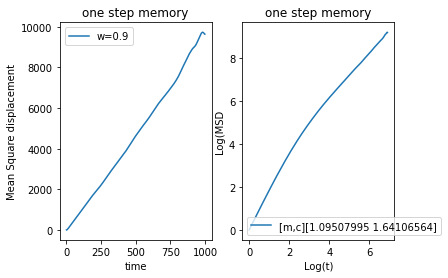

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

# Number of Steps
num_steps = 1000

# Number of Walkers
num_walks = 100

# probability
w = 0.9

# Variables for Mean Square distance Calculation
x2 = np.zeros(num_steps) 

# Variable for storing step length at each time
step_x = np.zeros(num_steps)

# Variable for time steps
t = np.arange(num_steps)

# Variable for walker position at time t
x = np.zeros(num_steps)

for k in range (num_walks):    
    prob_start = np.random.uniform(0,1)
    if prob_start < 0.5:
       step_x[0] = 1
       x[1] = 1
    else: 
       step_x[0] = -1
       x[1] = - 1
    for i in range(2, num_steps):
        prob = np.random.uniform(0,1)
        if prob < w:
            x[i] = x[i - 1] + step_x[i-2]
            step_x[i-1] = step_x[i-2]
        else:
            x[i] = x[i - 1] - step_x[i-2]
            step_x[i-1] = - step_x[i-2]
    for j in range(1,num_steps):
      c = 0
      for l in range(j,num_steps):
        c = c + np.square((x[l] - x[l-j]))
      x2[j] = x2[j] + c/(num_steps-j)


# For Ensemble average
x2 = x2/num_walks

# Variable for logarithmic values
logx2 = np.log(x2[1:])
logt = np.log(t[1:])

# Calculating Slope and intercept for logMSD vs Logt
slope_intercept = np.polyfit(logt,logx2,1)


# plotting stuff: 
plt.subplot(1,2,1)
plt.title("one step memory")
plt.plot(t, x2,label = "w="+str(w))
plt.xlabel('time')
plt.ylabel('Mean Square displacement')
plt.legend()

plt.subplot(1,2,2)
plt.title("one step memory")
#m = slope, c = intercept
plt.plot(logt, logx2,label = "[m,c]"+str(slope_intercept))
plt.xlabel('Log(t)')
plt.ylabel('Log(MSD')
plt.legend()
plt.show()




Part (C)


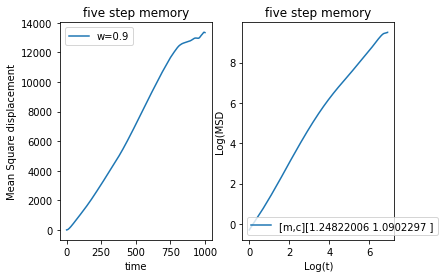

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

# Number of Steps
num_steps = 1000

# Number of Walkers
num_walks = 100

# probability
w = 0.9

# Variables for Mean Square distance Calculation
x2 = np.zeros(num_steps) 

# Variable for storing step length at each time
step_x = np.zeros(num_steps)

# Variable for time steps
t = np.arange(num_steps)

# Variable for walker position at time t
x = np.zeros(num_steps)

for k in range (num_walks):    
    prob_start = np.random.uniform(0,1)
    if prob_start < 0.5:
       step_x[0] = 1
       x[1] = 1
    else: 
       step_x[0] = -1
       x[1] = - 1
    for i in range(2,5):
        prob = np.random.uniform(0,1)
        t_prev = math.floor((i-1)*rand.random())
        if prob < 0.6:
          x[i] = x[i-1] + step_x[t_prev]
          step_x[i-1] = step_x[t_prev]
        else:
          x[i] = x[i-1] - step_x[t_prev]
          step_x[i-1] = - step_x[t_prev]
       # xx[i] = x[i]**2
       # x2[i] = x2[i] + xx[i]

    for i in range(6, num_steps):
        prob = np.random.uniform(0,1)
        t_prev = rand.randint(1,5)
        if prob < w:
            x[i] = x[i - 1] + step_x[i-1-t_prev]
            step_x[i-1] = step_x[i-1-t_prev]
        else:
            x[i] = x[i - 1] - step_x[i-1-t_prev]
            step_x[i-1] = - step_x[i-1-t_prev]
        #xx[i]= x[i]**2
        #x2[i]= x2[i] + xx[i]
    for j in range(1,num_steps):
      c = 0
      for l in range(j,num_steps):
        c = c + np.square((x[l] - x[l-j]))
      x2[j] = x2[j] + c/(num_steps-j)

# Ensemble average
x2 = x2/num_walks

# Variable for logarithmic values
logx2 = np.log(x2[1:])
logt = np.log(t[1:])

# Calculating Slope and intercept for logMSD vs Logt
slope_intercept = np.polyfit(logt,logx2,1)


# plotting stuff: 
plt.subplot(1,2,1)
plt.title("five step memory")
plt.plot(t, x2,label="w="+str(w))
plt.xlabel('time')
plt.ylabel('Mean Square displacement')
plt.legend()

plt.subplot(1,2,2)
plt.title("five step memory")
#m = slope, c = intercept
plt.plot(logt, logx2,label = "[m,c]"+str(slope_intercept))
plt.xlabel('Log(t)')
plt.ylabel('Log(MSD')
plt.legend()
plt.show()



Part (D)


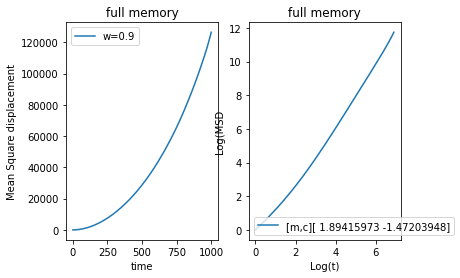

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

# Number of Steps
num_steps = 1000

# Number of Walkers
num_walks = 100

# probability
w = 0.9

# Variables for Mean Square distance Calculation
x2 = np.zeros(num_steps) 
xx = np.zeros(num_steps)

# Variable for storing step length at each time
step_x = np.zeros(num_steps)


# Variable for time steps
t = np.arange(num_steps)

# Variable for walker position at time t
x = np.zeros(num_steps)

for k in range (num_walks):    
  prob_start = np.random.uniform(0,1)
  if prob_start < 0.5:
    step_x[0] = 1
    x[1] = 1
  else: 
    step_x[0] = -1
    x[1] = - 1
  for i in range(2,num_steps):
    prob = np.random.uniform(0,1)
    t_prev = math.floor((i-1)*rand.random())
    if prob < w:
      x[i] = x[i - 1] + step_x[t_prev]
      step_x[i-1] = step_x[t_prev]
    else:
      x[i] = x[i - 1] - step_x[t_prev]
      step_x[i-1] = - step_x[t_prev]

  for j in range(1,num_steps):
    c = 0
    for l in range(j,num_steps):
      c = c + np.square((x[l] - x[l-j]))
    x2[j] = x2[j] + c/(num_steps-j)

# Ensemble average
x2 = x2/num_walks

# Variable for logarithmic values
logx2 = np.log(x2[1:])
logt = np.log(t[1:])

# Calculating Slope and intercept for logMSD vs Logt
slope_intercept = np.polyfit(logt,logx2,1)


# plotting stuff: 
plt.subplot(1,2,1)
plt.title("full memory")
plt.plot(t, x2,label="w="+str(w))
plt.xlabel('time')
plt.ylabel('Mean Square displacement')
plt.legend()

plt.subplot(1,2,2)
plt.title("full memory")
#m = slope, c = intercept
plt.plot(logt, logx2,label="[m,c]"+str(slope_intercept))
plt.xlabel('Log(t)')
plt.ylabel('Log(MSD')
plt.legend()
plt.show()


